# PART 1 - DATA COLLECTION

This is to Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.






In [ ]:
! pip install chembl_webresource_client

     |████████████████████████████████| 61kB 2.3MB/s 


In [ ]:
#! pip uninstall requests_cache

In [ ]:
#!pip install requests_cache==0.5.2

IMPORT LIBRARIES


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

TARGET SEARCH


In [ ]:
target = new_client.target
target_query = target.search('Tie2')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q02858', 'xref_name': None, 'xre...",Mus musculus,Tyrosine-protein kinase TIE-2,14.0,False,CHEMBL5199,"[{'accession': 'Q02858', 'component_descriptio...",SINGLE PROTEIN,10090
1,"[{'xref_id': 'Q02763', 'xref_name': None, 'xre...",Homo sapiens,Tyrosine-protein kinase TIE-2,12.0,False,CHEMBL4128,"[{'accession': 'Q02763', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Vascular endothelial growth factor receptor 2 ...,9.0,False,CHEMBL2111375,"[{'accession': 'P35968', 'component_descriptio...",SELECTIVITY GROUP,9606


SELECTION OF THE REQUIRED TARGET


In [ ]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL4128'

RETRIEVAL OF BIOACTIVITY DATA FOR OF TNFR1 (CHEMBL3378) THAT ARE REPORTED AS IC50 VALUES IN nanomolar unit (nM)

In [ ]:
activity = new_client.activity
activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32336,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,None,None,BAO_0000190,BAO_0000357,single protein format,Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1,None,None,CHEMBL1132739,Bioorg. Med. Chem. Lett.,2000.0,"{'bei': '14.76', 'le': '0.27', 'lle': '-0.12',...",CHEMBL69638,None,CHEMBL69638,5.47,False,http://www.openphacts.org/units/Nanomolar,120764,=,1,True,=,None,IC50,nM,None,3400.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,uM,UO_0000065,None,3.4
1,None,40694,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,None,None,BAO_0000190,BAO_0000357,single protein format,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1O,None,None,CHEMBL1132739,Bioorg. Med. Chem. Lett.,2000.0,"{'bei': '16.10', 'le': '0.29', 'lle': '1.66', ...",CHEMBL419082,None,CHEMBL419082,6.22,False,http://www.openphacts.org/units/Nanomolar,120769,=,1,True,=,None,IC50,nM,None,600.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,uM,UO_0000065,None,0.6
2,None,41980,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,None,None,BAO_0000190,BAO_0000357,single protein format,c1ccc(Oc2ccc(Nc3ncnc4ccccc34)cc2)cc1,None,None,CHEMBL1132739,Bioorg. Med. Chem. Lett.,2000.0,"{'bei': '15.15', 'le': '0.27', 'lle': '-0.42',...",CHEMBL304760,None,CHEMBL304760,4.75,False,http://www.openphacts.org/units/Nanomolar,120771,=,1,True,=,None,IC50,nM,None,17870.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,uM,UO_0000065,None,17.87
3,None,41987,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)n1cc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21,None,None,CHEMBL1132739,Bioorg. Med. Chem. Lett.,2000.0,"{'bei': '18.48', 'le': '0.33', 'lle': '1.32', ...",CHEMBL307982,None,CHEMBL307982,6.37,False,http://www.openphacts.org/units/Nanomolar,120767,=,1,True,=,None,IC50,nM,None,430.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,uM,UO_0000065,None,0.43
4,None,43153,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,None,None,BAO_0000190,BAO_0000357,single protein format,Nc1ncnc2c1c(-c1ccccc1Oc1ccccc1)cn2C1CCCC1,None,None,CHEMBL1132739,Bioorg. Med. Chem. Lett.,2000.0,"{'bei': '14.33', 'le': '0.26', 'lle': '-0.28',...",CHEMBL68774,None,CHEMBL68774,5.31,False,http://www.openphacts.org/units/Nanomolar,120763,=,1,True,=,None,IC50,nM,None,4900.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,uM,UO_0000065,None,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,None,19476938,[],CHEMBL4479786,Inhibition of recombinant human GST-tagged cyt...,B,None,None,BAO_0000190,BAO_0000019,assay format,Cc1sc(C(=O)N[C@@H]2[C@H](N)CCCC2(F)F)cc1-c1cnn...,None,None,CHEMBL4477252,Bioorg Med Chem Lett,2016.0,None,CHEMBL4552628,None,CHEMBL4552628,None,False,http://www.openphacts.org/units/Nanomolar,3256981,>,1,True,>,None,IC50,nM,None,100000.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,nM,UO_0000065,None,100000.0
1329,Active,20101910,[],CHEMBL4509061,Bayer in-house kinase assay with TEK,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C)c(-n2ccn3nc(-c4cccnc4)cc23)cc1NC(=O)c1...,None,None,CHE

In [ ]:
df.to_csv('bioactivity_data.csv', index=False)

MOUNTING GOOGLE DRIVE INTO COLAB FOR ACCESSING GOOGLE DRIVE WITHIN COLAB

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Creating a data folder in our Colab Notebooks folder on Google Drive.

In [ ]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/Major_project"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/Major_project’: File exists


In [ ]:
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/Major_project"
! ls -l "/content/gdrive/My Drive/Colab Notebooks/Major_project"
! ls
! head bioactivity_data.csv

total 999
-rw------- 1 root root 1022313 May  9 13:00 bioactivity_data.csv
bioactivity_data.csv  __MACOSX		padel.sh   sample_data
gdrive		      PaDEL-Descriptor	padel.zip
activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,32336,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,,,BAO_0000190,BAO_0000357,single protein format,Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1,,,

HANDLING MISSING DATA

In [ ]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32336,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,None,None,BAO_0000190,BAO_0000357,single protein format,Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1,None,None,CHEMBL1132739,Bioorg. Med. Chem. Lett.,2000.0,"{'bei': '14.76', 'le': '0.27', 'lle': '-0.12',...",CHEMBL69638,None,CHEMBL69638,5.47,False,http://www.openphacts.org/units/Nanomolar,120764,=,1,True,=,None,IC50,nM,None,3400.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,uM,UO_0000065,None,3.4
1,None,40694,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,None,None,BAO_0000190,BAO_0000357,single protein format,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1O,None,None,CHEMBL1132739,Bioorg. Med. Chem. Lett.,2000.0,"{'bei': '16.10', 'le': '0.29', 'lle': '1.66', ...",CHEMBL419082,None,CHEMBL419082,6.22,False,http://www.openphacts.org/units/Nanomolar,120769,=,1,True,=,None,IC50,nM,None,600.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,uM,UO_0000065,None,0.6
2,None,41980,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,None,None,BAO_0000190,BAO_0000357,single protein format,c1ccc(Oc2ccc(Nc3ncnc4ccccc34)cc2)cc1,None,None,CHEMBL1132739,Bioorg. Med. Chem. Lett.,2000.0,"{'bei': '15.15', 'le': '0.27', 'lle': '-0.42',...",CHEMBL304760,None,CHEMBL304760,4.75,False,http://www.openphacts.org/units/Nanomolar,120771,=,1,True,=,None,IC50,nM,None,17870.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,uM,UO_0000065,None,17.87
3,None,41987,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)n1cc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21,None,None,CHEMBL1132739,Bioorg. Med. Chem. Lett.,2000.0,"{'bei': '18.48', 'le': '0.33', 'lle': '1.32', ...",CHEMBL307982,None,CHEMBL307982,6.37,False,http://www.openphacts.org/units/Nanomolar,120767,=,1,True,=,None,IC50,nM,None,430.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,uM,UO_0000065,None,0.43
4,None,43153,[],CHEMBL847682,Inhibition of tie-2 at 5 uM ATP,B,None,None,BAO_0000190,BAO_0000357,single protein format,Nc1ncnc2c1c(-c1ccccc1Oc1ccccc1)cn2C1CCCC1,None,None,CHEMBL1132739,Bioorg. Med. Chem. Lett.,2000.0,"{'bei': '14.33', 'le': '0.26', 'lle': '-0.28',...",CHEMBL68774,None,CHEMBL68774,5.31,False,http://www.openphacts.org/units/Nanomolar,120763,=,1,True,=,None,IC50,nM,None,4900.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,uM,UO_0000065,None,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,None,19476938,[],CHEMBL4479786,Inhibition of recombinant human GST-tagged cyt...,B,None,None,BAO_0000190,BAO_0000019,assay format,Cc1sc(C(=O)N[C@@H]2[C@H](N)CCCC2(F)F)cc1-c1cnn...,None,None,CHEMBL4477252,Bioorg Med Chem Lett,2016.0,None,CHEMBL4552628,None,CHEMBL4552628,None,False,http://www.openphacts.org/units/Nanomolar,3256981,>,1,True,>,None,IC50,nM,None,100000.0,CHEMBL4128,Homo sapiens,Tyrosine-protein kinase TIE-2,9606,None,None,IC50,nM,UO_0000065,None,100000.0
1329,Active,20101910,[],CHEMBL4509061,Bayer in-house kinase assay with TEK,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cc(C)c(-n2ccn3nc(-c4cccnc4)cc23)cc1NC(=O)c1...,None,None,CHE

DATA PRE-PROCESSING

THIS STEP INVOLVES LABELLING DATA AS EITHER ACTIVE, INACTIVE OR INTERMEDIATE. 

Labeling compounds as either being active, inactive or intermediate The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) > 1000:
    bioactivity_class.append("inactive")
  else:
    bioactivity_class.append("active")
  #else:
    #bioactivity_class.append("intermediate")

In [ ]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL69638,Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1,3400.0
1,CHEMBL419082,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1O,600.0
2,CHEMBL304760,c1ccc(Oc2ccc(Nc3ncnc4ccccc34)cc2)cc1,17870.0
3,CHEMBL307982,CC(C)n1cc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21,430.0
4,CHEMBL68774,Nc1ncnc2c1c(-c1ccccc1Oc1ccccc1)cn2C1CCCC1,4900.0
...,...,...,...
1328,CHEMBL4552628,Cc1sc(C(=O)N[C@@H]2[C@H](N)CCCC2(F)F)cc1-c1cnn...,100000.0
1329,CHEMBL3907057,Cc1cc(C)c(-n2ccn3nc(-c4cccnc4)cc23)cc1NC(=O)c1...,0.45
1330,CHEMBL3907057,Cc1cc(C)c(-n2ccn3nc(-c4cccnc4)cc23)cc1NC(=O)c1...,0.7
1331,CHEMBL4526351,Cc1cc(NC(=O)c2cccc(S(F)(F)(F)(F)F)c2)cc(-n2ccn...,1100.0


In [ ]:
new_df=pd.concat([df3,pd.Series(bioactivity_class)], axis=1)
new_df.columns
new_df=new_df.rename(columns = {0:"bioactivity_class"})

In [ ]:
new_df.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [ ]:
! cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/Major_project"

In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/Major_project"

bioactivity_data.csv  bioactivity_preprocessed_data.csv


# PART 2 - EXPLORATORY DATA ANALYSIS

INSTALL CONDA AND RDKIT

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-05-09 13:00:59--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   175MB/s    in 0.5s    

2021-05-09 13:00:59 (175 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

LOADING THE BIOACTIVITY DATA

In [ ]:
import pandas as pd
df = pd.read_csv('bioactivity_preprocessed_data.csv')
df = df.dropna()

IMPORTING LIBRARIES

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

CALCULATING LIPINSKI DESCRIPTORS

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,370.456,5.58790,1.0,5.0
1,386.455,4.55870,2.0,6.0
2,313.360,5.16570,1.0,4.0
3,344.418,5.05370,1.0,5.0
4,370.456,5.58790,1.0,5.0
...,...,...,...,...
1112,342.402,4.06400,0.0,5.0
1113,356.429,4.37242,0.0,5.0
1114,356.429,4.37242,0.0,5.0
1115,410.399,5.08280,0.0,5.0


COMBINIG BOTH THE dfs

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL69638,Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1,3400.00,inactive,370.456,5.5879,1.0,5.0
1,CHEMBL419082,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1O,600.00,active,386.455,4.5587,2.0,6.0
2,CHEMBL304760,c1ccc(Oc2ccc(Nc3ncnc4ccccc34)cc2)cc1,17870.00,inactive,313.360,5.1657,1.0,4.0
3,CHEMBL307982,CC(C)n1cc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21,430.00,active,344.418,5.0537,1.0,5.0
4,CHEMBL68774,Nc1ncnc2c1c(-c1ccccc1Oc1ccccc1)cn2C1CCCC1,4900.00,inactive,370.456,5.5879,1.0,5.0
...,...,...,...,...,...,...,...,...
1280,CHEMBL4470400,COc1ccc(-c2ccc(Cn3cc(-c4ccccc4)nn3)cc2)cn1,1000.00,inactive,NaN,NaN,NaN,NaN
1281,CHEMBL4449700,COc1ccc(-c2ccc(Cn3cc(-c4ccc(C)cc4)nn3)cc2)cn1,0.26,active,NaN,NaN,NaN,NaN
1282,CHEMBL4556899,COc1ccc(-c2ccc(Cn3cc(-c4cccc(C)c4)nn3)cc2)cn1,1000.00,active,NaN,NaN,NaN,NaN
1283,CHEMBL4528844,COc1ccc(-c2ccc(Cn3cc(-c4ccc(C(F)(F)F)cc4)nn3)c...,0.30,inactive,NaN,NaN,NaN,NaN


CONVERTING IC50 TO pIC50

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL69638,Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1,3400.00,inactive,370.456,5.5879,1.0,5.0
1,CHEMBL419082,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1O,600.00,active,386.455,4.5587,2.0,6.0
2,CHEMBL304760,c1ccc(Oc2ccc(Nc3ncnc4ccccc34)cc2)cc1,17870.00,inactive,313.360,5.1657,1.0,4.0
3,CHEMBL307982,CC(C)n1cc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21,430.00,active,344.418,5.0537,1.0,5.0
4,CHEMBL68774,Nc1ncnc2c1c(-c1ccccc1Oc1ccccc1)cn2C1CCCC1,4900.00,inactive,370.456,5.5879,1.0,5.0
...,...,...,...,...,...,...,...,...
1280,CHEMBL4470400,COc1ccc(-c2ccc(Cn3cc(-c4ccccc4)nn3)cc2)cn1,1000.00,inactive,NaN,NaN,NaN,NaN
1281,CHEMBL4449700,COc1ccc(-c2ccc(Cn3cc(-c4ccc(C)cc4)nn3)cc2)cn1,0.26,active,NaN,NaN,NaN,NaN
1282,CHEMBL4556899,COc1ccc(-c2ccc(Cn3cc(-c4cccc(C)c4)nn3)cc2)cn1,1000.00,active,NaN,NaN,NaN,NaN
1283,CHEMBL4528844,COc1ccc(-c2ccc(Cn3cc(-c4ccc(C(F)(F)F)cc4)nn3)c...,0.30,inactive,NaN,NaN,NaN,NaN


In [ ]:
df_combined.standard_value.describe()

count      1117.000000
mean       4993.845689
std       14648.355354
min           0.130000
25%          24.000000
50%         259.000000
75%        1700.000000
max      100000.000000
Name: standard_value, dtype: float64

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.



In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

Apply the norm_value() function so that the values in the standard_value column is normalized.



In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL69638,Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1,inactive,370.456,5.5879,1.0,5.0,3400.00
1,CHEMBL419082,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1O,active,386.455,4.5587,2.0,6.0,600.00
2,CHEMBL304760,c1ccc(Oc2ccc(Nc3ncnc4ccccc34)cc2)cc1,inactive,313.360,5.1657,1.0,4.0,17870.00
3,CHEMBL307982,CC(C)n1cc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21,active,344.418,5.0537,1.0,5.0,430.00
4,CHEMBL68774,Nc1ncnc2c1c(-c1ccccc1Oc1ccccc1)cn2C1CCCC1,inactive,370.456,5.5879,1.0,5.0,4900.00
...,...,...,...,...,...,...,...,...
1280,CHEMBL4470400,COc1ccc(-c2ccc(Cn3cc(-c4ccccc4)nn3)cc2)cn1,inactive,NaN,NaN,NaN,NaN,1000.00
1281,CHEMBL4449700,COc1ccc(-c2ccc(Cn3cc(-c4ccc(C)cc4)nn3)cc2)cn1,active,NaN,NaN,NaN,NaN,0.26
1282,CHEMBL4556899,COc1ccc(-c2ccc(Cn3cc(-c4cccc(C)c4)nn3)cc2)cn1,active,NaN,NaN,NaN,NaN,1000.00
1283,CHEMBL4528844,COc1ccc(-c2ccc(Cn3cc(-c4ccc(C(F)(F)F)cc4)nn3)c...,inactive,NaN,NaN,NaN,NaN,0.30


In [ ]:
df_norm.standard_value_norm.describe()

count      1117.000000
mean       4993.845689
std       14648.355354
min           0.130000
25%          24.000000
50%         259.000000
75%        1700.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL69638,Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1,inactive,370.456,5.5879,1.0,5.0,5.468521
1,CHEMBL419082,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1O,active,386.455,4.5587,2.0,6.0,6.221849
2,CHEMBL304760,c1ccc(Oc2ccc(Nc3ncnc4ccccc34)cc2)cc1,inactive,313.360,5.1657,1.0,4.0,4.747875
3,CHEMBL307982,CC(C)n1cc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21,active,344.418,5.0537,1.0,5.0,6.366532
4,CHEMBL68774,Nc1ncnc2c1c(-c1ccccc1Oc1ccccc1)cn2C1CCCC1,inactive,370.456,5.5879,1.0,5.0,5.309804
...,...,...,...,...,...,...,...,...
1280,CHEMBL4470400,COc1ccc(-c2ccc(Cn3cc(-c4ccccc4)nn3)cc2)cn1,inactive,NaN,NaN,NaN,NaN,6.000000
1281,CHEMBL4449700,COc1ccc(-c2ccc(Cn3cc(-c4ccc(C)cc4)nn3)cc2)cn1,active,NaN,NaN,NaN,NaN,9.585027
1282,CHEMBL4556899,COc1ccc(-c2ccc(Cn3cc(-c4cccc(C)c4)nn3)cc2)cn1,active,NaN,NaN,NaN,NaN,6.000000
1283,CHEMBL4528844,COc1ccc(-c2ccc(Cn3cc(-c4ccc(C(F)(F)F)cc4)nn3)c...,inactive,NaN,NaN,NaN,NaN,9.522879


In [ ]:
df_final.to_csv('bioactivity_data_3class_pIC50.csv')

In [ ]:
df_final.pIC50.describe()

count    1117.000000
mean        6.636849
std         1.268555
min         4.000000
25%         5.769551
50%         6.586700
75%         7.619789
max         9.886057
Name: pIC50, dtype: float64

REMOVING THE INTERMEDIATE BIOACTIVITY CLASS

In [ ]:
#df_2class = df_final[df_final.bioactivity_class != 'intermediate']
#df_2class

# Exploratory Data Analysis (Chemical Space Analysis) via Lipinski 

---



In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

SCATTER PLOT OF MW VERSUS LOGP

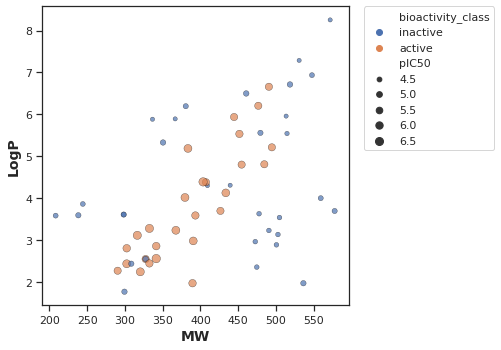

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

CREATING BOX PLOTS


1) pIC50 VALUE

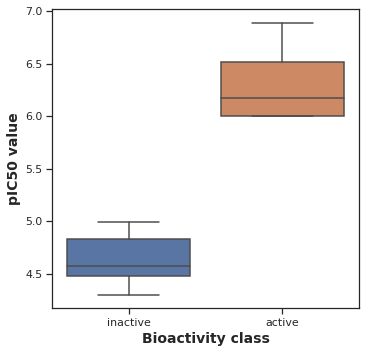

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Statistical analysis | Mann-Whitney U Test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,2.194090e-11,0.05,Different distribution (reject H0)


2) MW

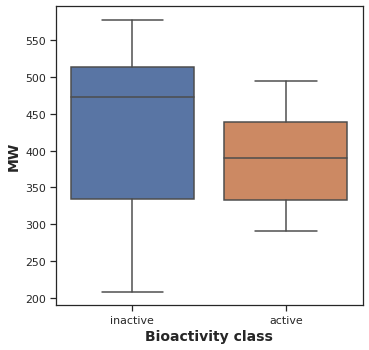

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,308.0,0.030119,0.05,Different distribution (reject H0)


3)LogP

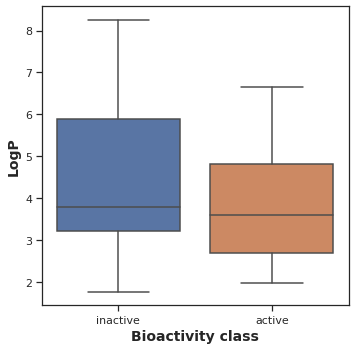

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,348.5,0.103326,0.05,Same distribution (fail to reject H0)


4) NumHDonors

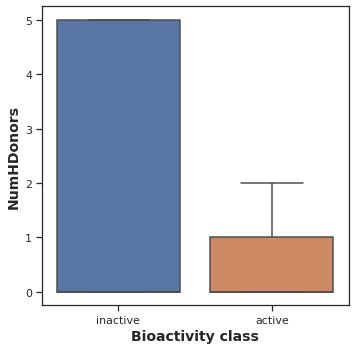

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,355.5,0.099198,0.05,Same distribution (fail to reject H0)


5) NumHAcceptors

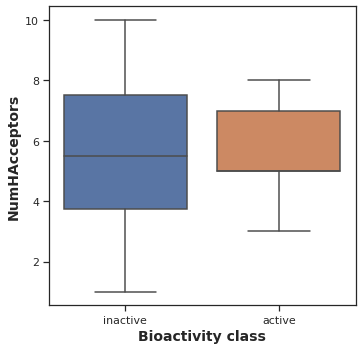

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,421.5,0.438957,0.05,Same distribution (fail to reject H0)


DOWNLOADING ALL FILES

In [ ]:
#! zip -r results.zip . -i *.csv *.pdf

# PART 3 DESCRIPTOR DATA PREP

DOWNLOAD PaDEL-Descriptor

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-05-09 13:03:34--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-05-09 13:03:34--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M  32.0MB/s    in 0.8s    

2021-05-09 13:03:36 (32.0 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]

--2021-05-09 13:03:36--  https://g

In [ ]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config 

LOAD THE BIOACTIVITY DATA

In [ ]:
import pandas as pd
df3 = pd.read_csv('bioactivity_data_3class_pIC50.csv')
df3 = df3.dropna()
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL69638,Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1,inactive,370.456,5.58790,1.0,5.0,5.468521
1,1,CHEMBL419082,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1O,active,386.455,4.55870,2.0,6.0,6.221849
2,2,CHEMBL304760,c1ccc(Oc2ccc(Nc3ncnc4ccccc34)cc2)cc1,inactive,313.360,5.16570,1.0,4.0,4.747875
3,3,CHEMBL307982,CC(C)n1cc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21,active,344.418,5.05370,1.0,5.0,6.366532
4,4,CHEMBL68774,Nc1ncnc2c1c(-c1ccccc1Oc1ccccc1)cn2C1CCCC1,inactive,370.456,5.58790,1.0,5.0,5.309804
...,...,...,...,...,...,...,...,...,...
1112,1112,CHEMBL3917971,COc1cccc(C(=O)Nc2cc(-n3ccn4nc(-c5cccnc5)cc34)c...,active,342.402,4.06400,0.0,5.0,6.598599
1113,1113,CHEMBL3942395,Cc1cc(C)c(-n2ccn3nc(-c4cccnc4)cc23)cc1NC(=O)c1...,active,356.429,4.37242,0.0,5.0,8.337242
1114,1114,CHEMBL3905415,Cc1cc(C)c(-n2ccn3nc(-c4cccnc4)cc23)cc1NC(=O)c1...,active,356.429,4.37242,0.0,5.0,7.275724
1115,1115,CHEMBL3933416,Cc1cc(C)c(-n2ccn3nc(-c4cccnc4)cc23)cc1NC(=O)c1...,active,410.399,5.08280,0.0,5.0,7.259637


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1	CHEMBL69638
Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1O	CHEMBL419082
c1ccc(Oc2ccc(Nc3ncnc4ccccc34)cc2)cc1	CHEMBL304760
CC(C)n1cc(-c2ccc(Oc3ccccc3)cc2)c2c(N)ncnc21	CHEMBL307982
Nc1ncnc2c1c(-c1ccccc1Oc1ccccc1)cn2C1CCCC1	CHEMBL68774


In [ ]:
#! cat smiles.smi

In [ ]:
! cat molecule.smi | wc -l

1005


Calculate PaDEL descriptors

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL69638 in molecule.smi (1/1005). 
Processing CHEMBL419082 in molecule.smi (2/1005). 
Processing CHEMBL304760 in molecule.smi (3/1005). Average speed: 5.73 s/mol.
Processing CHEMBL307982 in molecule.smi (4/1005). Average speed: 2.89 s/mol.
Processing CHEMBL68774 in molecule.smi (5/1005). Average speed: 2.38 s/mol.
Processing CHEMBL69129 in molecule.smi (6/1005). Average speed: 1.79 s/mol.
Processing CHEMBL69827 in molecule.smi (7/1005). Average speed: 1.74 s/mol.
Processing CHEMBL306380 in molecule.smi (8/1005). Average speed: 1.49 s/mol.
Processing CHEMBL306012 in molecule.smi (9/1005). Average speed: 1.39 s/mol.
Processing CHEMBL47940 in molecule.smi (10/1005). Average speed: 1.27 s/mol.
Processing CHEMBL416091 in molecule.smi (12/1005). Average speed: 1.11 s/mol.
Processing CHEMBL302281 in molecule.smi (11/1005). Average speed: 1.16 s/mol.
Processing CHEMBL44577 in molecule.smi (13/1005). Average speed: 1.03 s/mol.
Processing CHEMBL297363 in molecule.smi (14/1005). Av

In [ ]:
! ls -l

total 136516
-rw-r--r-- 1 root root   161637 May  9 13:03 bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root  1022313 May  9 12:58 bioactivity_data.csv
-rw-r--r-- 1 root root   102232 May  9 13:00 bioactivity_preprocessed_data.csv
-rw-r--r-- 1 root root  1797359 May  9 13:09 descriptors_output.csv
drwx------ 5 root root     4096 May  9 13:00 gdrive
drwxr-xr-x 3 root root     4096 May  9 13:03 __MACOSX
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    71759 May  9 13:04 molecule.smi
drwxrwxr-x 4 root root     4096 May  9 13:03 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 May  9 12:54 padel.sh
-rw-r--r-- 1 root root      231 May  9 13:03 padel.sh.1
-rw-r--r-- 1 root root 25768637 May  9 12:54 padel.zip
-rw-r--r-- 1 root root 25768637 May  9 13:03 padel.zip.1
drwxr-xr-x 1 root root     4096 May  6 13:44 sample_data


In [ ]:
! cp descriptors_output.csv "/content/gdrive/My Drive/Colab Notebooks/Major_project"

PREPARING X,Y DATA MATRICES

PREPARING X DATA MATRIX - Molecule.smi

In [ ]:
df3_X = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Major_project/descriptors_output_molecule_smi.csv")
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL419082,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL69638,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL307982,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL304760,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL68774,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,CHEMBL3917971,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,CHEMBL3942395,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002,CHEMBL3905415,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1003,CHEMBL3933416,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1003,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Y variable

Convert IC50 to pIC50

In [ ]:
df3_Y = df3['pIC50']
df3_Y


0       5.468521
1       6.221849
2       4.747875
3       6.366532
4       5.309804
          ...   
1112    6.598599
1113    8.337242
1114    7.275724
1115    7.259637
1116    6.216811
Name: pIC50, Length: 1005, dtype: float64

Combining X and Y variable

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3=dataset3.dropna()
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.468521
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.221849
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.747875
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.366532
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.309804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.301030
992,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.978811
993,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.721246
994,1.0,1.0,1.0,0.0,0.0,0.0,0.

SAVING THE CSV FILE

In [ ]:
dataset3.to_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
! cp bioactivity_data_3class_pIC50_pubchem_fp.csv "/content/gdrive/My Drive/Colab Notebooks/Major_project"

**Making the sample test compounds for Ledum Pal**

---




Remove the molecule.smi before calculating descriptors for smiles.smi (Ledum Pal)

In [ ]:
!rm molecule.smi

In [ ]:
import pandas as pd
df4 = pd.read_csv('smiles_wo_dupli.smi', header=None)
df4 = df4.dropna()
df4

,0
0,CC1=CCC(=C(C)C)CC1
1,CC1=CCC(CC1)C(=C)C
2,CC(=CCCC(=C)CC=O)C
3,CC1(C2CC1C3(C(C2)O3)C)C
4,CC1=CCC(CC1)(C(C)C)O
5,CC(C)C12CCC(C=C1)(OO2)C
6,CC1=CCC(CC1=O)C(=C)C
7,CC(=O)OC1CC2CCC1(C2(C)C)C
8,CC(=CCCC(=CCOC(=O)C)C)C
9,CC1CCC2C1C3C(C3(C)C)CCC2=C


In [ ]:
df4.to_csv('smiles_wo_dupli.smi', sep='\t', index=False, header=False)

In [ ]:
! cat smiles_wo_dupli.smi | head -5

CC1=CCC(=C(C)C)CC1
CC1=CCC(CC1)C(=C)C
CC(=CCCC(=C)CC=O)C
CC1(C2CC1C3(C(C2)O3)C)C
CC1=CCC(CC1)(C(C)C)O


In [ ]:
! bash padel.sh

Processing AUTOGEN_smiles_wo_dupli_1 in smiles_wo_dupli.smi (1/36). 
Processing AUTOGEN_smiles_wo_dupli_2 in smiles_wo_dupli.smi (2/36). 
Processing AUTOGEN_smiles_wo_dupli_3 in smiles_wo_dupli.smi (3/36). Average speed: 1.48 s/mol.
Processing AUTOGEN_smiles_wo_dupli_4 in smiles_wo_dupli.smi (4/36). Average speed: 0.78 s/mol.
Processing AUTOGEN_smiles_wo_dupli_5 in smiles_wo_dupli.smi (5/36). Average speed: 0.57 s/mol.
Processing AUTOGEN_smiles_wo_dupli_6 in smiles_wo_dupli.smi (6/36). Average speed: 0.52 s/mol.
Processing AUTOGEN_smiles_wo_dupli_7 in smiles_wo_dupli.smi (7/36). Average speed: 0.49 s/mol.
Processing AUTOGEN_smiles_wo_dupli_8 in smiles_wo_dupli.smi (8/36). Average speed: 0.42 s/mol.
Processing AUTOGEN_smiles_wo_dupli_9 in smiles_wo_dupli.smi (9/36). Average speed: 0.40 s/mol.
Processing AUTOGEN_smiles_wo_dupli_10 in smiles_wo_dupli.smi (10/36). Average speed: 0.38 s/mol.
Processing AUTOGEN_smiles_wo_dupli_11 in smiles_wo_dupli.smi (11/36). Average speed: 0.35 s/mol.
Pro

In [ ]:
! cp descriptors_output.csv "/content/gdrive/My Drive/Colab Notebooks/Major_project"

In [ ]:
# Drop the name column 
smiles = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Major_project/descriptors_output_smiles_smi.csv")
smiles = smiles.drop(columns=['Name'])
smiles


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
smiles


In [ ]:
smiles.to_csv('smiles.csv', index = False )

In [ ]:
! cp smiles.csv "/content/gdrive/My Drive/Colab Notebooks/Major_project"

# PART 4 - REGRESION MODEL WITH RANDOM FOREST

IMPORT NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df_4 = pd.read_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv')

INPUT FEATURES

In [ ]:
X = df_4.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
946,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
947,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
948,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0

OUTPUT FEATURES

In [ ]:
Y = df_4.pIC50
Y

0      5.468521
1      6.221849
2      4.747875
3      6.366532
4      5.309804
         ...   
945    8.301030
946    6.978811
947    8.721246
948    8.173925
949    9.397940
Name: pIC50, Length: 950, dtype: float64

EXAMINING DATA DIMENSION

In [ ]:
X.shape

(950, 881)

In [ ]:
Y.shape

(950,)

REMOVING LOW VARIANCE FEATURES - For Molecule

---



In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection_vt = VarianceThreshold(threshold=(.8 * (1 - .8)))   
_ = selection_vt.fit(X)
#X = selection_vt.fit_transform(X)
mask = selection_vt.get_support()
X = X.loc[:, mask]
X  #features

,PubchemFP19,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP180,PubchemFP181,PubchemFP187,PubchemFP188,PubchemFP193,PubchemFP199,PubchemFP258,PubchemFP287,PubchemFP293,PubchemFP300,PubchemFP341,PubchemFP345,PubchemFP346,PubchemFP353,PubchemFP357,PubchemFP359,PubchemFP363,PubchemFP366,PubchemFP372,PubchemFP378,PubchemFP379,PubchemFP381,PubchemFP382,PubchemFP383,PubchemFP386,PubchemFP388,PubchemFP389,PubchemFP391,PubchemFP397,PubchemFP405,...,PubchemFP655,PubchemFP656,PubchemFP666,PubchemFP671,PubchemFP672,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP685,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP713,PubchemFP714,PubchemFP716,PubchemFP721,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP742,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP818,PubchemFP821
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
946,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
947,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
948,0.0,0.0,0.0,0

In [ ]:
X.shape

(950, 153)

In [ ]:
X_columns = X.columns.tolist()
X_columns

['PubchemFP19',
 'PubchemFP23',
 'PubchemFP24',
 'PubchemFP33',
 'PubchemFP143',
 'PubchemFP145',
 'PubchemFP146',
 'PubchemFP150',
 'PubchemFP152',
 'PubchemFP153',
 'PubchemFP180',
 'PubchemFP181',
 'PubchemFP187',
 'PubchemFP188',
 'PubchemFP193',
 'PubchemFP199',
 'PubchemFP258',
 'PubchemFP287',
 'PubchemFP293',
 'PubchemFP300',
 'PubchemFP341',
 'PubchemFP345',
 'PubchemFP346',
 'PubchemFP353',
 'PubchemFP357',
 'PubchemFP359',
 'PubchemFP363',
 'PubchemFP366',
 'PubchemFP372',
 'PubchemFP378',
 'PubchemFP379',
 'PubchemFP381',
 'PubchemFP382',
 'PubchemFP383',
 'PubchemFP386',
 'PubchemFP388',
 'PubchemFP389',
 'PubchemFP391',
 'PubchemFP397',
 'PubchemFP405',
 'PubchemFP412',
 'PubchemFP420',
 'PubchemFP421',
 'PubchemFP422',
 'PubchemFP431',
 'PubchemFP435',
 'PubchemFP438',
 'PubchemFP439',
 'PubchemFP443',
 'PubchemFP445',
 'PubchemFP450',
 'PubchemFP451',
 'PubchemFP467',
 'PubchemFP476',
 'PubchemFP477',
 'PubchemFP480',
 'PubchemFP484',
 'PubchemFP485',
 'PubchemFP487',
 

In [ ]:
len(X_columns)

153

In [ ]:
smiles_final = smiles.filter(X_columns)
smiles_final

,PubchemFP19,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP180,PubchemFP181,PubchemFP187,PubchemFP188,PubchemFP193,PubchemFP199,PubchemFP258,PubchemFP287,PubchemFP293,PubchemFP300,PubchemFP341,PubchemFP345,PubchemFP346,PubchemFP353,PubchemFP357,PubchemFP359,PubchemFP363,PubchemFP366,PubchemFP372,PubchemFP378,PubchemFP379,PubchemFP381,PubchemFP382,PubchemFP383,PubchemFP386,PubchemFP388,PubchemFP389,PubchemFP391,PubchemFP397,PubchemFP405,...,PubchemFP655,PubchemFP656,PubchemFP666,PubchemFP671,PubchemFP672,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP685,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP713,PubchemFP714,PubchemFP716,PubchemFP721,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP742,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP805,PubchemFP818,PubchemFP821
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
smiles_final.shape

(36, 153)

REMOVING LOW VARIANCE FEATURES - For Smiles

---





In [ ]:
#smiles_X = pd.read_csv('smiles.csv')

In [ ]:
#from sklearn.feature_selection import VarianceThreshold
#selection_vt = VarianceThreshold(threshold=(.8 * (1 - .8)))   
#_ = selection_vt.fit(smiles_X)
#X = selection_vt.fit_transform(X)
#mask = selection_vt.get_support()
#smiles_X = smiles_X.loc[:, mask]
#smiles_X

In [ ]:
#smiles_X.shape

SPLITTING THE DATA SET (80/20)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #train_features, test_features, train_labels, test_labels

In [ ]:
X_train.shape, Y_train.shape

((760, 153), (760,))

In [ ]:
X_test.shape, Y_test.shape

((190, 153), (190,))

BUILDING A REGRESSION MODEL USING RANDOM FOREST

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.19317479561349493

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([6.67364564, 7.06306575, 6.95095112, 6.81898179, 6.06294577,
       7.10550361, 7.62454186, 6.13951916, 6.90009125, 6.12122113,
       5.96601544, 6.75492563, 6.22003602, 5.81679281, 5.74206028,
       7.65037009, 5.46967081, 4.98186047, 6.9252641 , 5.5296609 ,
       6.75641861, 5.86938346, 6.49496712, 6.86413945, 8.2220451 ,
       6.43739348, 6.39426271, 7.44346792, 7.46679732, 6.46048113,
       6.26106047, 6.41676987, 5.06037433, 6.02398371, 6.8407172 ,
       6.67364564, 7.77423984, 7.67976917, 5.34835991, 6.53490768,
       5.81395401, 6.54582165, 6.1753987 , 6.38382238, 6.13527775,
       4.21420605, 6.1753987 , 7.58599133, 5.86623291, 8.00846124,
       5.71063436, 6.63869294, 5.88990283, 7.48655527, 7.58843689,
       4.87405043, 7.43957944, 6.64472001, 8.0647427 , 6.36117299,
       7.86595895, 7.62454186, 6.10907376, 8.03908288, 6.10119391,
       6.63317051, 4.84655915, 5.74229665, 6.43739348, 6.36117299,
       6.59957708, 4.0781813 , 6.85389707, 6.741884  , 5.65864

In [ ]:
Y_pred_smiles = model.predict(smiles_final) #predictions
Y_pred_smiles = pd.DataFrame(Y_pred_smiles)
Y_pred_smiles.columns = ['pIC50']
Y_pred_smiles

,pIC50
0,5.317983
1,5.299368
2,5.262166
3,5.259091
4,5.136909
5,5.251915
6,5.279066
7,5.357149
8,5.381050
9,5.318943


Performance Metrics

---





In [ ]:
#import numpy as np
# Calculate the absolute errors
#errors = abs(Y_pred - Y_test)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
#mape = 100 * (errors / Y_test)
# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')

Determine Performance Metrics

---



In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.8808368560074419
Mean Squared Error: 1.2954040881958784
Root Mean Squared Error: 1.1381581999862227


Effect of n_estimators

---



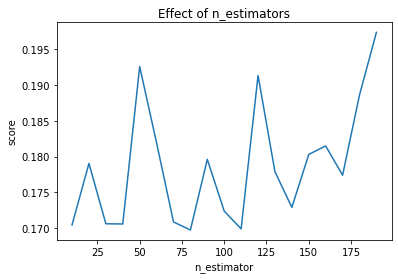

In [ ]:
# Effect of n_estimators
import matplotlib.pyplot as plt
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
scores

[0.16054014378344705,
 0.11652705800274399,
 0.12974480249176712,
 0.13585377466439663,
 0.13107982797676843,
 0.11633831738529588,
 0.12437365329103191,
 0.12056669972344636,
 0.1267315335640351,
 0.12514058269844963,
 0.13055631967203307,
 0.12225660584690488,
 0.13397240857277426,
 0.12442962732221696,
 0.132243782486963,
 0.13148502731983835,
 0.1296136091057799,
 0.13371627309837097,
 0.13935157050817792]

In [ ]:
df_ledum_smiles = pd.read_csv('smiles_wo_dupli.csv', header = None)
df_ledum_smiles.columns = ['Smiles'] 
df_ledum_smiles

,Smiles
0,CC1=CCC(=C(C)C)CC1
1,CC1=CCC(CC1)C(=C)C
2,CC(=CCCC(=C)CC=O)C
3,CC1(C2CC1C3(C(C2)O3)C)C
4,CC1=CCC(CC1)(C(C)C)O
5,CC(C)C12CCC(C=C1)(OO2)C
6,CC1=CCC(CC1=O)C(=C)C
7,CC(=O)OC1CC2CCC1(C2(C)C)C
8,CC(=CCCC(=CCOC(=O)C)C)C
9,CC1CCC2C1C3C(C3(C)C)CCC2=C


In [ ]:
final = pd.concat([df_ledum_smiles,Y_pred_smiles],axis=1)
final

,Smiles,pIC50
0,CC1=CCC(=C(C)C)CC1,5.317983
1,CC1=CCC(CC1)C(=C)C,5.299368
2,CC(=CCCC(=C)CC=O)C,5.262166
3,CC1(C2CC1C3(C(C2)O3)C)C,5.259091
4,CC1=CCC(CC1)(C(C)C)O,5.136909
5,CC(C)C12CCC(C=C1)(OO2)C,5.251915
6,CC1=CCC(CC1=O)C(=C)C,5.279066
7,CC(=O)OC1CC2CCC1(C2(C)C)C,5.357149
8,CC(=CCCC(=CCOC(=O)C)C)C,5.381050
9,CC1CCC2C1C3C(C3(C)C)CCC2=C,5.318943


In [ ]:
final_10 = final.sort_values("pIC50", ascending=False)
final_10 = final_10.head(10)
final_10.to_csv('final_10_Tie2.csv',index=False)

SCATTER PLOT OF EXPERIMENTAL vs PREDICTED pIC50 VALUES

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

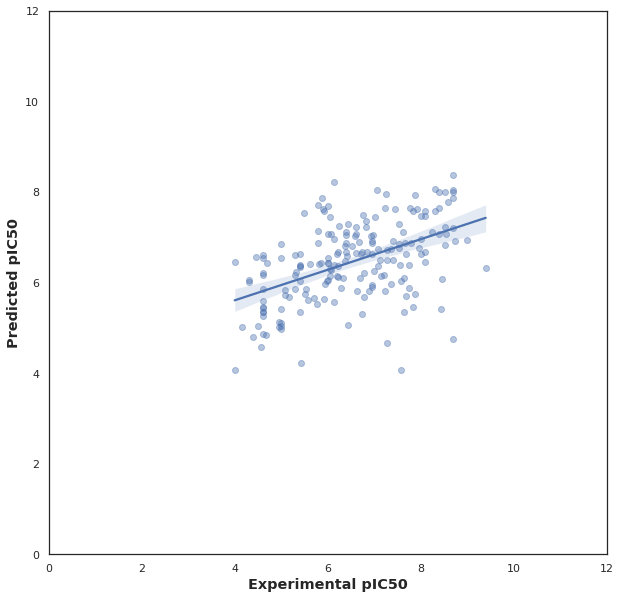

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(10,10)
plt.show

# CREATING A FEATURE IMPORTANCE PLOT

---



In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Text(0.5, 1.0, 'Visualizing Important Features')

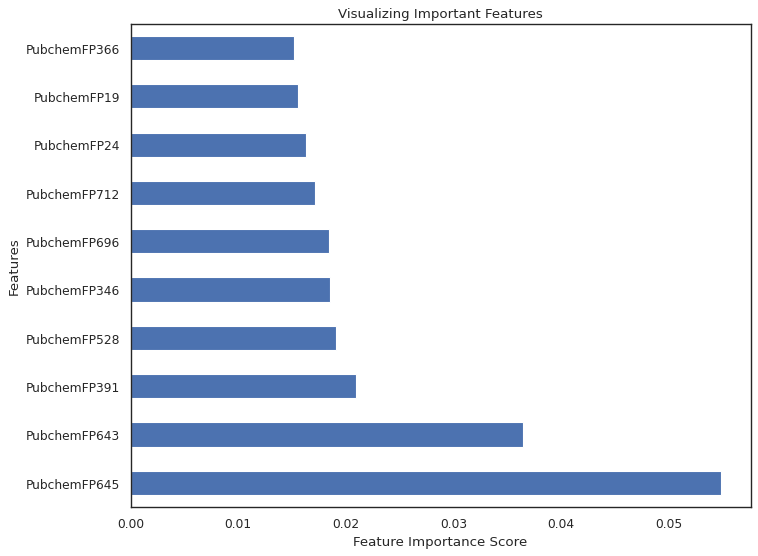

In [ ]:
figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")


# PART 5 - COMPARING REGRESSORS

In [ ]:
! pip install lazypredict

     |████████████████████████████████| 127.6 MB 21 kB/s 
     |████████████████████████████████| 269 kB 26.0 MB/s 
     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 72 kB 915 kB/s 
     |████████████████████████████████| 10.1 MB 22.6 MB/s 
     |████████████████████████████████| 1.2 MB 61.5 MB/s 
     |████████████████████████████████| 6.8 MB 22.9 MB/s 
     |████████████████████████████████| 248 kB 64.0 MB/s 
     |████████████████████████████████| 14.5 MB 5.7 kB/s 
     |████████████████████████████████| 302 kB 38.3 MB/s 
     |████████████████████████████████| 82 kB 884 kB/s 
     |████████████████████████████████| 40 kB 4.9 MB/s 
     |████████████████████████████████| 48 kB 4.8 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 97 kB 5.2 MB/s 
     |████████████████████████████████| 67 kB 5.7 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=39

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


LOAD THE DATASET

In [ ]:
df_5 = pd.read_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df_5.drop('pIC50', axis=1)
Y = df_5.pIC50

REMOVING LOW VARIANCE FEATURES

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(125, 133)

DATA SPLITTING USING 80/20 RATIO

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

COMPARING ML ALGORITHMS

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train, test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 38/38 [00:10<00:00,  3.64it/s]

[06:33:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


PERFORMANCE TABLE OF THE TRAINING SET

In [ ]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,57970280972660601822845564474890677517791246533...,-2632816927508335587273809348260162084007412449...,2985187041263731229128057419438548320256.00,0.17
TransformedTargetRegressor,4477089824098500162355200.00,-20333449617780688103145472.00,2623413498805.94,0.03
LinearRegression,4477089824098500162355200.00,-20333449617780688103145472.00,2623413498805.94,0.01
KernelRidge,19.09,-81.16,5.27,0.02
GaussianProcessRegressor,11.91,-48.55,4.10,0.02
PassiveAggressiveRegressor,1.42,-0.91,0.80,0.01
LinearSVR,1.41,-0.88,0.80,0.05
HuberRegressor,1.36,-0.61,0.74,0.09
OrthogonalMatchingPursuit,1.32,-0.45,0.70,0.01


PERFORMANCE TABLE OF THE TESTING SET

In [ ]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,57970280972660601822845564474890677517791246533...,-2632816927508335587273809348260162084007412449...,2985187041263731229128057419438548320256.00,0.17
TransformedTargetRegressor,4477089824098500162355200.00,-20333449617780688103145472.00,2623413498805.94,0.03
LinearRegression,4477089824098500162355200.00,-20333449617780688103145472.00,2623413498805.94,0.01
KernelRidge,19.09,-81.16,5.27,0.02
GaussianProcessRegressor,11.91,-48.55,4.10,0.02
PassiveAggressiveRegressor,1.42,-0.91,0.80,0.01
LinearSVR,1.41,-0.88,0.80,0.05
HuberRegressor,1.36,-0.61,0.74,0.09
OrthogonalMatchingPursuit,1.32,-0.45,0.70,0.01


DATA VISUALIZATION OF MODEL PERFORMANCE

1) BAR PLOT OF R-SQUARED VALUES

[(0.0, 1.0)]

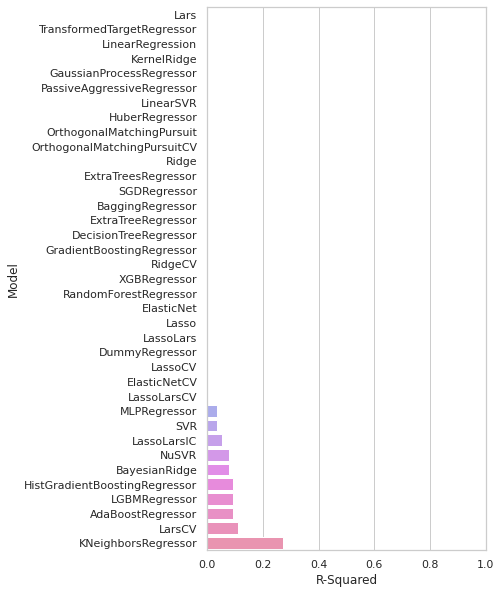

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

2) BAR PLOT OF RMSE VALUES

[(0.0, 10.0)]

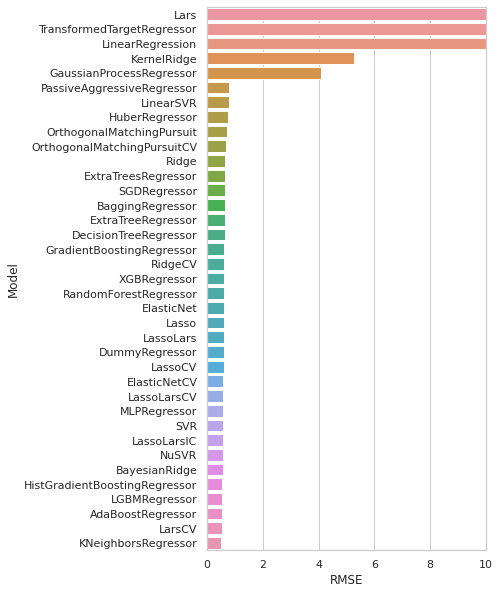

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

3) BAR PLOT OF CALCULATION TIME

[(0.0, 10.0)]

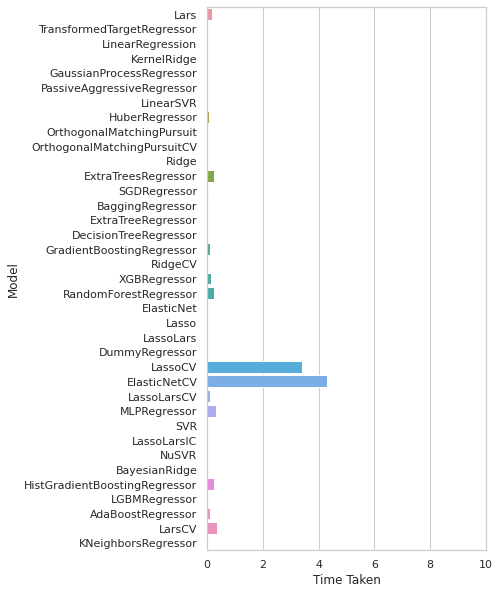

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))